In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Data Fusion Assignment 2025 Data.csv')
df.sample(10)

,class,id,color,transparency,device_id,spectrum_0 + 740,spectrum_1 + 740,spectrum_2 + 740,spectrum_3 + 740,spectrum_4 + 740,...,sample_raw_321 + 740,sample_raw_322 + 740,sample_raw_323 + 740,sample_raw_324 + 740,sample_raw_325 + 740,sample_raw_326 + 740,sample_raw_327 + 740,sample_raw_328 + 740,sample_raw_329 + 740,sample_raw_330 + 740
202,4,23,blue,o,B02EFC17B97B46B2,0.254593,0.233318,0.216261,0.203035,0.192688,...,5.68,5.53,5.33,5.09,4.80,4.47,4.10,3.70,3.25,2.77
53,1,76,white,o,D02B30ACFD92433E,1.035213,1.034754,1.034408,1.034198,1.034064,...,6.66,6.41,6.11,5.78,5.41,5.01,4.57,4.10,3.60,3.06
321,6,47,white,o,802215F15396F9FE,1.141284,1.142185,1.143060,1.143676,1.143982,...,7.92,7.62,7.28,6.91,6.49,6.03,5.54,5.00,4.42,3.78
258,5,54,white,o,B0236F1F2D02C632,0.570493,0.570673,0.570857,0.571037,0.571226,...,4.24,4.07,3.88,3.68,3.44,3.19,2.91,2.62,2.30,1.95
115,2,59,blue,o,D02B30ACFD92433E,1.035357,1.034978,1.034699,1.034550,1.034477,...,6.67,6.41,6.12,5.78,5.42,5.01,4.58,4.11,3.60,3.06
131,3,10,green,o,B02EFC17B97B46B2,0.625625,0.633422,0.641692,0.650479,0.659883,...,6.52,6.25,5.95,5.61,5.24,4.83,4.40,3.94,3.44,2.92
207,4,28,white,o,802215F15396F9FE,0.196307,0.196771,0.197258,0.197721,0.198152,...,1.21,1.17,1.11,1.06,0.99,0.92,0.85,0.77,0.68,0.58
231,5,21,green,o,D02B30ACFD92433E,0.210595,0.211357,0.212119,0.212878,0.213627,...,1.36,1.31,1.25,1.18,1.11,1.02,0.93,0.84,0.73,0.62
257,5,53,orange,o,B0236F1F2D02C632,0.631907,0.632153,0.632418,0.632683,0.632952,...,4.44,4.27,4.07,3.85,3.61,3.34,3.05,2.74,2.41,2.05
342,6,68,blue,o,B02EFC17B97B46B2,0.140924,0.147047,0.153833,0.161343,0.169705,...,4.72,4.52,4.31,4.06,3.80,3.50,3.19,2.85,2.50,2.12


In [ ]:
DISCO_PC = pd.read_csv('scores_8_comp.csv' , sep = ";")
DISCO_PC.sample(10)

,comp1,comp2
119,-0.064630,-0.021040
118,-0.064691,-0.020649
63,-0.025764,-0.039463
133,-0.044430,-0.014195
80,-0.049523,-0.018151
64,-0.022268,-0.023563
125,-0.008454,0.000129
7,-0.068744,0.005880
131,-0.062813,-0.003039
121,-0.064643,-0.020883


In [ ]:
add_columns = ["class", "color", "transparency"]
selected_columns = [col for col in df.columns if col.startswith("spectrum_")] + add_columns
spectrum_df = df[selected_columns]
spectrum_df.head()

,spectrum_0 + 740,spectrum_1 + 740,spectrum_2 + 740,spectrum_3 + 740,spectrum_4 + 740,spectrum_5 + 740,spectrum_6 + 740,spectrum_7 + 740,spectrum_8 + 740,spectrum_9 + 740,...,spectrum_324 + 740,spectrum_325 + 740,spectrum_326 + 740,spectrum_327 + 740,spectrum_328 + 740,spectrum_329 + 740,spectrum_330 + 740,class,color,transparency
0,0.782157,0.754932,0.730555,0.709195,0.690707,0.674890,0.661358,0.649536,0.638722,0.628352,...,0.762691,0.762037,0.761381,0.761238,0.761424,0.761624,0.761410,1,white,o
1,0.948156,0.947904,0.947607,0.947237,0.946815,0.946384,0.945992,0.945662,0.945352,0.945005,...,0.837447,0.836808,0.836148,0.836038,0.836280,0.836527,0.836312,1,white,o
2,0.285657,0.285247,0.284841,0.284432,0.284022,0.283619,0.283231,0.282856,0.282474,0.282062,...,0.202864,0.202691,0.202516,0.202477,0.202525,0.202576,0.202517,1,none,s
3,0.296280,0.295966,0.295631,0.295269,0.294887,0.294499,0.294121,0.293758,0.293394,0.293011,...,0.226896,0.226739,0.226576,0.226560,0.226638,0.226717,0.226668,1,none,s
4,0.171568,0.171535,0.171500,0.171459,0.171414,0.171371,0.171338,0.171317,0.171298,0.171272,...,0.181026,0.180908,0.180784,0.180777,0.180844,0.180909,0.180873,1,none,t


In [ ]:
def change_column_name(column_names):
    updated_column_names = []
    for title in column_names:
        if title.startswith('spectrum') or title.startswith('wr_raw') or title.startswith('sample_raw'):
            updated_title = title.replace(' + 740', '')
            updated_column_names.append(updated_title)
        else:
            updated_column_names.append(title)
    return updated_column_names

In [ ]:
spectrum_df.columns = change_column_name(spectrum_df.columns)
spectrum_df.head()

,spectrum_0,spectrum_1,spectrum_2,spectrum_3,spectrum_4,spectrum_5,spectrum_6,spectrum_7,spectrum_8,spectrum_9,...,spectrum_324,spectrum_325,spectrum_326,spectrum_327,spectrum_328,spectrum_329,spectrum_330,class,color,transparency
0,0.782157,0.754932,0.730555,0.709195,0.690707,0.674890,0.661358,0.649536,0.638722,0.628352,...,0.762691,0.762037,0.761381,0.761238,0.761424,0.761624,0.761410,1,white,o
1,0.948156,0.947904,0.947607,0.947237,0.946815,0.946384,0.945992,0.945662,0.945352,0.945005,...,0.837447,0.836808,0.836148,0.836038,0.836280,0.836527,0.836312,1,white,o
2,0.285657,0.285247,0.284841,0.284432,0.284022,0.283619,0.283231,0.282856,0.282474,0.282062,...,0.202864,0.202691,0.202516,0.202477,0.202525,0.202576,0.202517,1,none,s
3,0.296280,0.295966,0.295631,0.295269,0.294887,0.294499,0.294121,0.293758,0.293394,0.293011,...,0.226896,0.226739,0.226576,0.226560,0.226638,0.226717,0.226668,1,none,s
4,0.171568,0.171535,0.171500,0.171459,0.171414,0.171371,0.171338,0.171317,0.171298,0.171272,...,0.181026,0.180908,0.180784,0.180777,0.180844,0.180909,0.180873,1,none,t


In [ ]:
copy_df = spectrum_df.copy(deep=True)
sp_df = copy_df.drop(['color', 'transparency', 'class'], axis=1)
sp_df.head()

,spectrum_0,spectrum_1,spectrum_2,spectrum_3,spectrum_4,spectrum_5,spectrum_6,spectrum_7,spectrum_8,spectrum_9,...,spectrum_321,spectrum_322,spectrum_323,spectrum_324,spectrum_325,spectrum_326,spectrum_327,spectrum_328,spectrum_329,spectrum_330
0,0.782157,0.754932,0.730555,0.709195,0.690707,0.674890,0.661358,0.649536,0.638722,0.628352,...,0.763257,0.763487,0.763256,0.762691,0.762037,0.761381,0.761238,0.761424,0.761624,0.761410
1,0.948156,0.947904,0.947607,0.947237,0.946815,0.946384,0.945992,0.945662,0.945352,0.945005,...,0.837685,0.838095,0.837967,0.837447,0.836808,0.836148,0.836038,0.836280,0.836527,0.836312
2,0.285657,0.285247,0.284841,0.284432,0.284022,0.283619,0.283231,0.282856,0.282474,0.282062,...,0.202998,0.203067,0.203011,0.202864,0.202691,0.202516,0.202477,0.202525,0.202576,0.202517
3,0.296280,0.295966,0.295631,0.295269,0.294887,0.294499,0.294121,0.293758,0.293394,0.293011,...,0.226905,0.227035,0.227019,0.226896,0.226739,0.226576,0.226560,0.226638,0.226717,0.226668
4,0.171568,0.171535,0.171500,0.171459,0.171414,0.171371,0.171338,0.171317,0.171298,0.171272,...,0.180999,0.181116,0.181115,0.181026,0.180908,0.180784,0.180777,0.180844,0.180909,0.180873


In [ ]:
pca = PCA()
pca_components = pca.fit_transform(sp_df)
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])

In [ ]:
print("Explained variance ratio for first 5 components:", pca.explained_variance_ratio_[:5])

Explained variance ratio for first 5 components: [9.72348487e-01 1.73068984e-02 7.49953846e-03 2.19108263e-03
 3.61287180e-04]


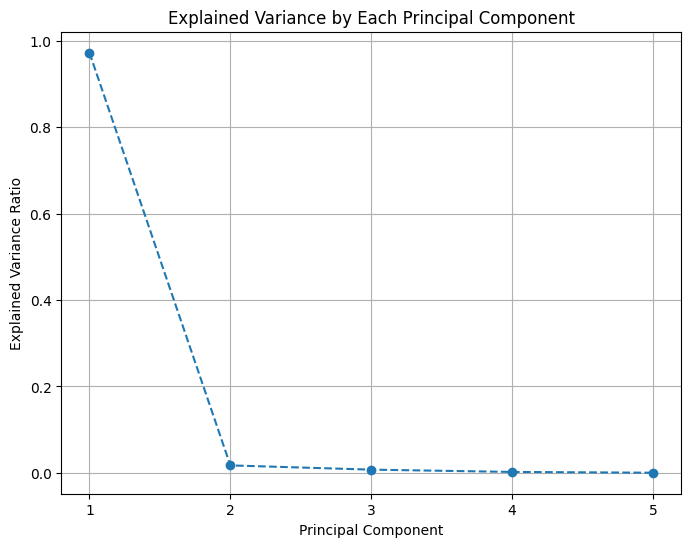

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), pca.explained_variance_ratio_[:5], marker='o', linestyle='--')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()

In [ ]:
selected_columns = spectrum_df[['class', 'color', 'transparency']]
concat = pd.concat([pca_df, selected_columns], axis=1)
color_transparency_dummies = pd.get_dummies(concat[['color', 'transparency']])
concat = pd.concat([concat.drop(['color', 'transparency'], axis=1), color_transparency_dummies], axis=1)
concat.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,color_green,color_none,color_orange,color_purple,color_red,color_white,color_yellow,transparency_o,transparency_s,transparency_t
0,0.570519,0.719349,-0.857723,1.136377,0.972703,0.081603,0.031177,0.058233,0.034470,-0.042267,...,False,False,False,False,False,True,False,True,False,False
1,3.513499,-0.702543,0.451106,-0.231209,0.047293,0.053328,0.094691,-0.028033,0.008184,-0.015328,...,False,False,False,False,False,True,False,True,False,False
2,-8.220992,-0.609788,0.244184,0.041824,-0.020631,-0.021745,-0.013744,0.011887,0.021964,0.008909,...,False,True,False,False,False,False,False,False,True,False
3,-7.892865,-0.557601,0.216045,0.040037,-0.015814,-0.040227,-0.026455,0.019712,0.017658,0.014936,...,False,True,False,False,False,False,False,False,True,False
4,-9.390117,-0.198693,0.017352,0.235269,-0.056566,0.036186,-0.010553,0.009704,-0.008782,-0.006030,...,False,True,False,False,False,False,False,False,False,True


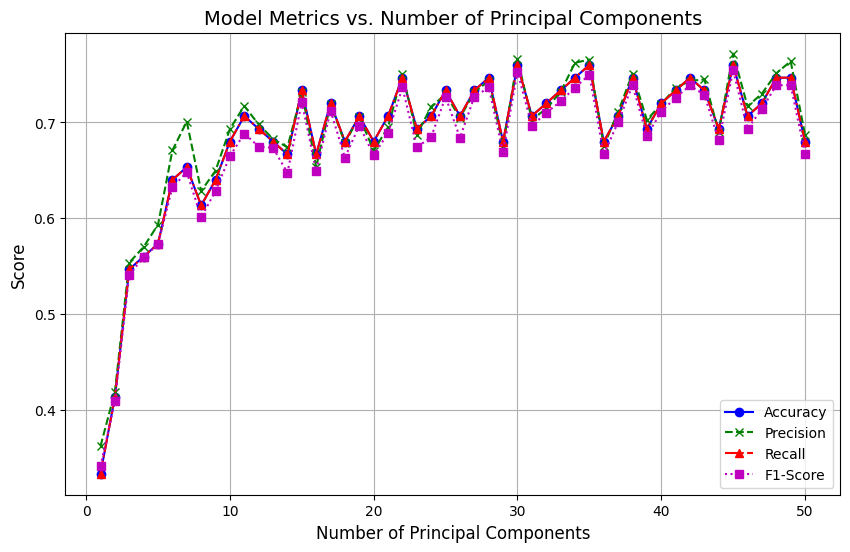

In [ ]:
rf_accuracies = []
rf_precisions = []
rf_recalls = []
rf_f1_scores = []
rf_model_30 = None
rf_tree_depths_30 = []

for n_components in range(1, 51):
    X = concat.iloc[:, :n_components]
    y = concat['class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)

    rf_accuracy = accuracy_score(y_test, rf_predictions)
    rf_accuracies.append(rf_accuracy)

    precision, recall, f1, _ = precision_recall_fscore_support(y_test, rf_predictions, average='weighted')

    rf_precisions.append(precision)
    rf_recalls.append(recall)
    rf_f1_scores.append(f1)

    if n_components == 30:
        rf_model_30 = rf_model
        tree_depths = [tree.get_depth() for tree in rf_model.estimators_]
        rf_tree_depths_30 = tree_depths

plt.figure(figsize=(10, 6))

plt.plot(range(1, 51), rf_accuracies, label='Accuracy', marker='o', linestyle='-', color='b')
plt.plot(range(1, 51), rf_precisions, label='Precision', marker='x', linestyle='--', color='g')
plt.plot(range(1, 51), rf_recalls, label='Recall', marker='^', linestyle='-.', color='r')
plt.plot(range(1, 51), rf_f1_scores, label='F1-Score', marker='s', linestyle=':', color='m')

plt.title('Model Metrics vs. Number of Principal Components', fontsize=14)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Score', fontsize=12)

plt.legend()
plt.grid(True)
plt.show()

Random Forest Model for 30 Components
Number of Trees: 100
Average Depth of Trees: 10.67


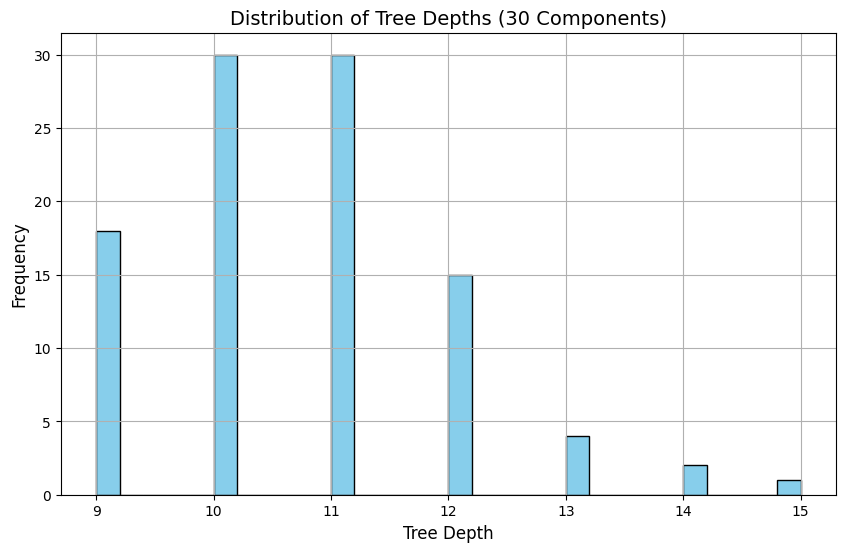


Top Features based on Importance (30 Components):
   Feature  Importance
12    PC13    0.088397
7      PC8    0.074775
11    PC12    0.057298
5      PC6    0.051355
14    PC15    0.050292


In [ ]:
if rf_model_30 is not None:
    print(f"Random Forest Model for 30 Components")
    print(f"Number of Trees: {len(rf_model_30.estimators_)}")
    print(f"Average Depth of Trees: {sum(rf_tree_depths_30) / len(rf_tree_depths_30):.2f}")

    # Plot the distribution of tree depths
    plt.figure(figsize=(10, 6))
    plt.hist(rf_tree_depths_30, bins=30, edgecolor='black', color='skyblue')
    plt.title('Distribution of Tree Depths (30 Components)', fontsize=14)
    plt.xlabel('Tree Depth', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.show()

    # Feature Importances for 30 Components
    importances = rf_model_30.feature_importances_
    importance_df = pd.DataFrame({'Feature': [f'PC{i+1}' for i in range(30)], 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    print("\nTop Features based on Importance (30 Components):")
    print(importance_df.head())